In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
train = pd.read_csv('../datasets/train_cleaned.csv')
test = pd.read_csv('../datasets/test_cleaned.csv')

In [61]:
from sklearn.preprocessing import LabelEncoder

lc = LabelEncoder()

In [62]:
cols_to_encode = ['Sex','Embarked','title','last_name']

for col in cols_to_encode:
    print(col)
    print(train[col].value_counts())
    print(test[col].value_counts())
    train[col] = lc.fit_transform(train[col])
    test[col] = lc.fit_transform(test[col])
    print(train[col].value_counts())
    print(test[col].value_counts())
    print('----------------')

Sex
male      577
female    314
Name: Sex, dtype: int64
male      266
female    152
Name: Sex, dtype: int64
1    577
0    314
Name: Sex, dtype: int64
1    266
0    152
Name: Sex, dtype: int64
----------------
Embarked
S    646
C    168
Q     77
Name: Embarked, dtype: int64
S    270
C    102
Q     46
Name: Embarked, dtype: int64
2    646
0    168
1     77
Name: Embarked, dtype: int64
2    270
0    102
1     46
Name: Embarked, dtype: int64
----------------
title
mr        538
miss      183
mrs       130
master     40
Name: title, dtype: int64
mr        245
miss       79
mrs        73
master     21
Name: title, dtype: int64
2    538
1    183
3    130
0     40
Name: title, dtype: int64
2    245
1     79
3     73
0     21
Name: title, dtype: int64
----------------
last_name
andersson    9
sage         7
carter       6
skoog        6
goodwin      6
            ..
troutt       1
mitkoff      1
phillips     1
abbing       1
giglio       1
Name: last_name, Length: 667, dtype: int64
sage        

In [9]:
# train['cabin_code_new'] = lc.fit_transform(train['cabin_code'])
# test['cabin_code_new'] = lc.fit_transform(test['cabin_code'])

In [63]:
cabin_rank = {'B':1,'C':2,'D':3,'E':4,'A':5,'T':6,'F':7,'G':8}
train['cabin_code'] = train.cabin_code.map(cabin_rank)
test['cabin_code'] = test.cabin_code.map(cabin_rank)

In [64]:
test.groupby('cabin_code').Fare.mean()

cabin_code
1    155.011745
2    119.871419
3     54.279319
4     64.343613
5     37.820332
7     24.070705
8      9.669133
Name: Fare, dtype: float64

In [42]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_code,last_name,first_name,title,ticket_type
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,8,73,owen harris,2,A
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,2,136,john bradley (florence briggs thayer),3,PC
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,8,255,laina,1,STONO
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,2,202,jacques heath (lily may peel),3,NaN
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,8,11,william henry,2,NaN


In [65]:
train.ticket_type.fillna('NA',inplace=True)
test.ticket_type.fillna('NA',inplace=True)
train['ticket_type'] = lc.fit_transform(train['ticket_type'])
test['ticket_type'] = lc.fit_transform(test['ticket_type'])

In [66]:
cols_to_drop = ['Cabin','Ticket','Name','first_name']
train.drop(cols_to_drop,axis=1,inplace = True)
test.drop(cols_to_drop,axis=1,inplace = True)

In [67]:
train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_code,last_name,title,ticket_type
0,1,0,3,1,22.0,1,0,7.2500,2,8,73,2,0
1,2,1,1,0,38.0,1,0,71.2833,0,2,136,3,10
2,3,1,3,0,26.0,0,0,7.9250,2,8,255,1,26
3,4,1,1,0,35.0,1,0,53.1000,2,2,202,3,9
4,5,0,3,1,35.0,0,0,8.0500,2,8,11,2,9


In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int32  
 9   cabin_code   891 non-null    int64  
 10  last_name    891 non-null    int32  
 11  title        891 non-null    int32  
 12  ticket_type  891 non-null    int32  
dtypes: float64(2), int32(5), int64(6)
memory usage: 73.2 KB


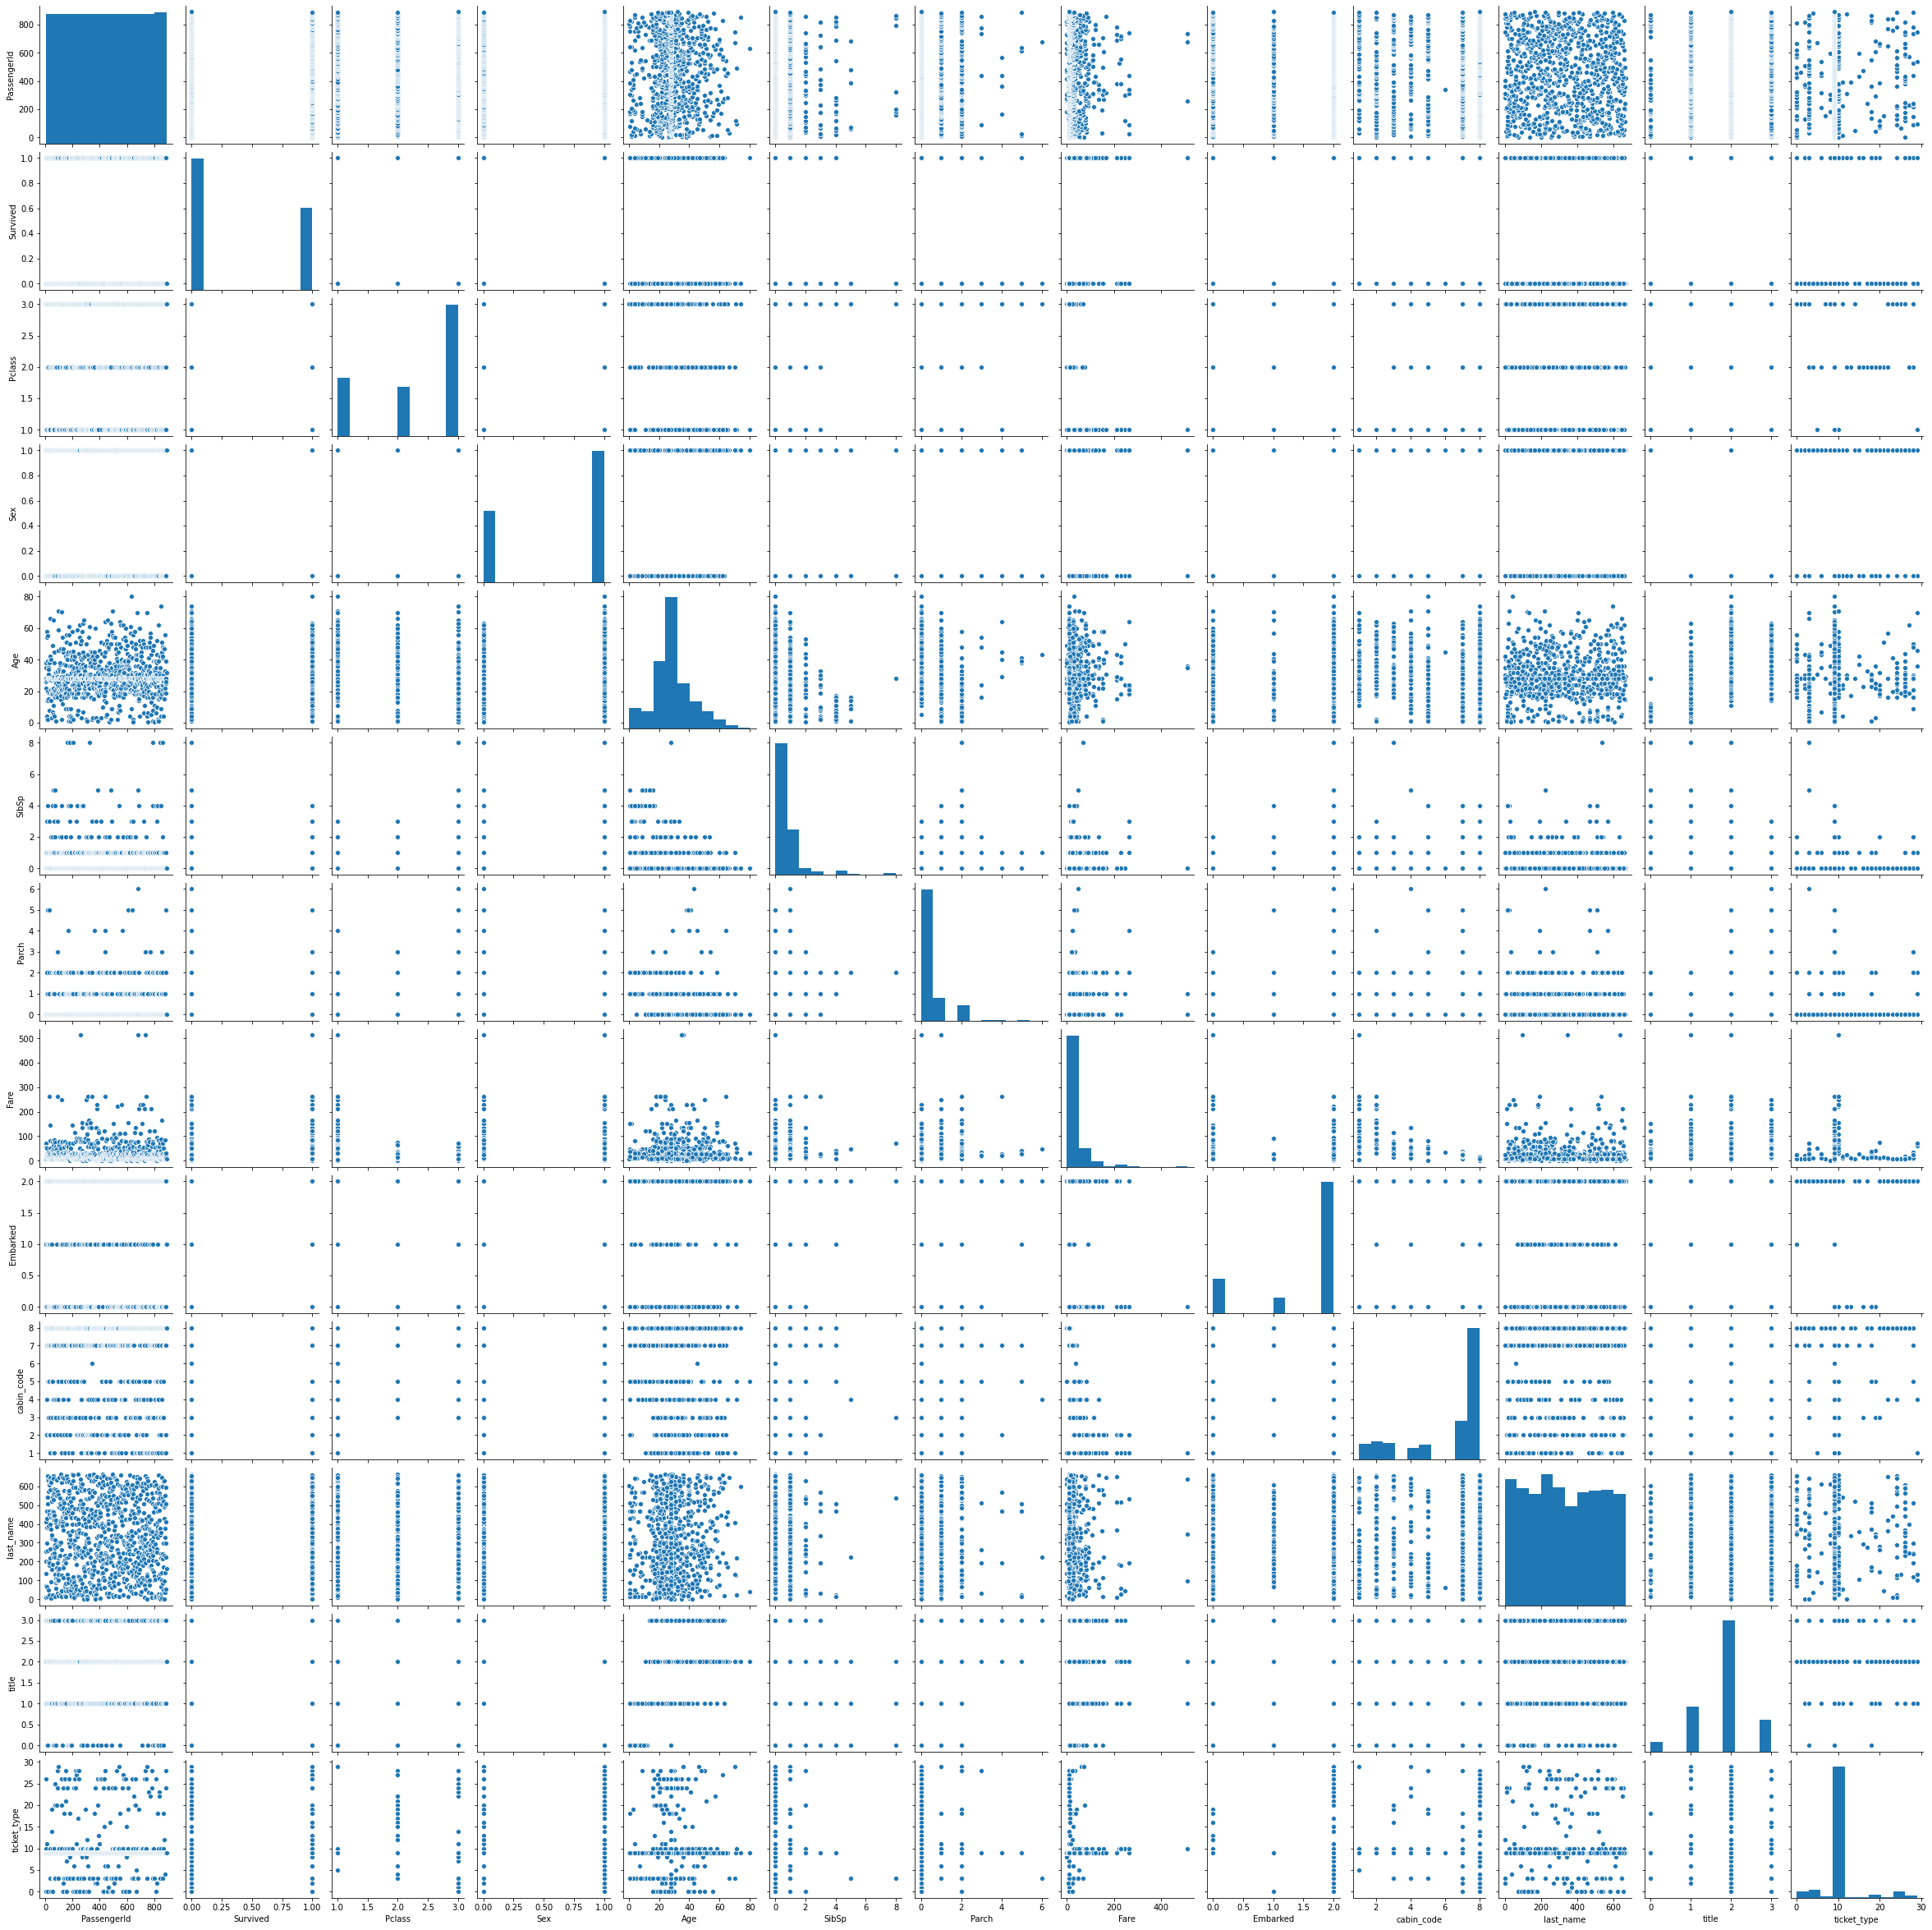

In [17]:
sns.pairplot(train)

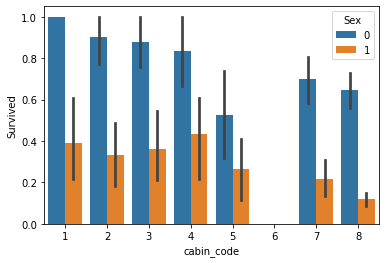

In [18]:
ax = sns.barplot(x="cabin_code", y="Survived", hue="Sex",data=train)
##No Survivors on CABIN asiel 6
## Female survior rate higher than males
## Higher fare classes higher survior chances

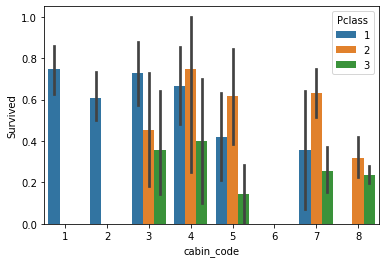

In [133]:
sns.barplot(x="cabin_code", y="Survived", hue="Pclass",data=train)

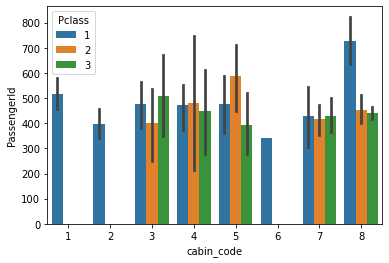

In [134]:
sns.barplot(x="cabin_code", y="PassengerId", hue="Pclass",data=train)

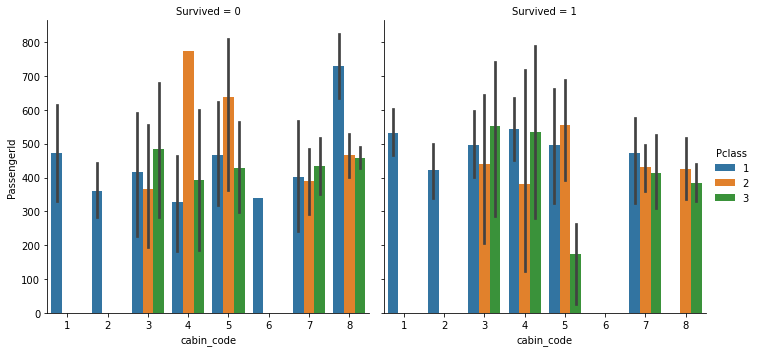

In [135]:
sns.catplot(x="cabin_code", y="PassengerId", hue="Pclass",col= "Survived",data=train,kind="bar")

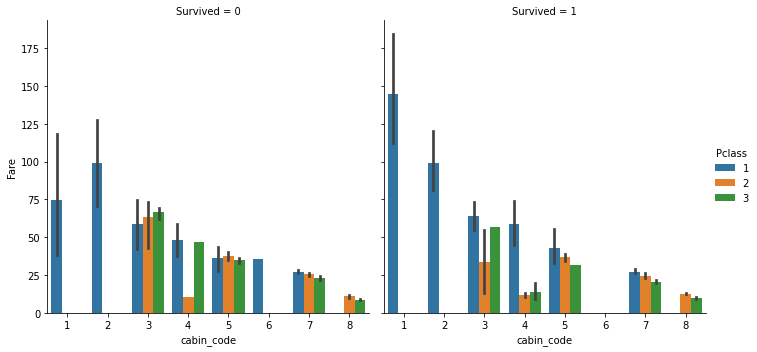

In [136]:
sns.catplot(x="cabin_code", y="Fare", hue="Pclass",col= "Survived",data=train,kind="bar")

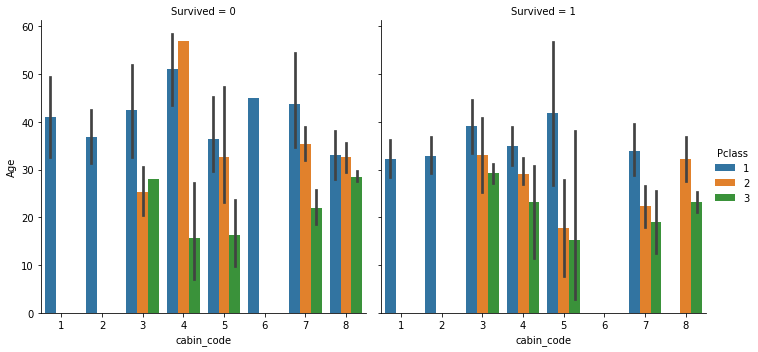

In [137]:
sns.catplot(x="cabin_code", y="Age", hue="Pclass",col= "Survived",data=train,kind="bar")

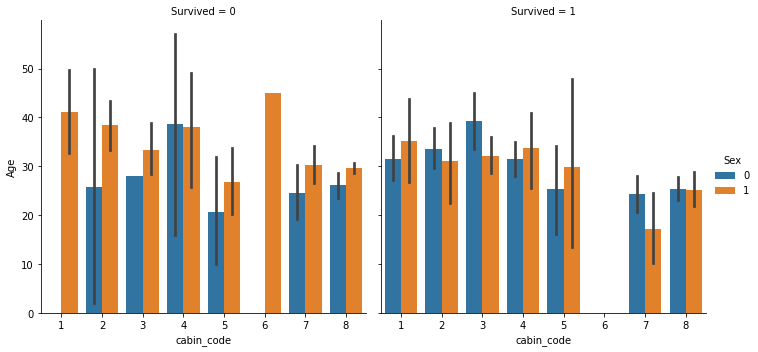

In [138]:
sns.catplot(x="cabin_code", y="Age", hue="Sex",col= "Survived",data=train,kind="bar")

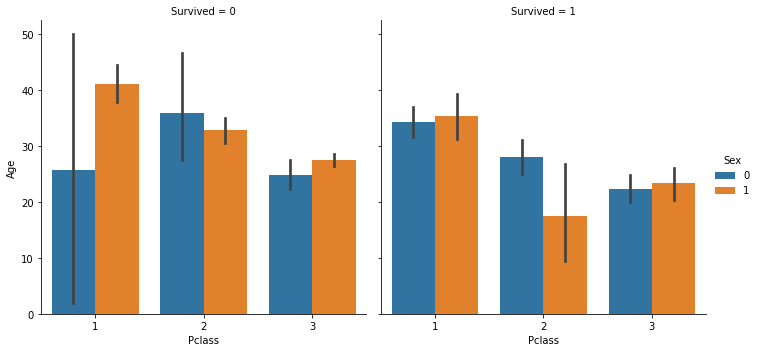

In [139]:
sns.catplot(x="Pclass", y="Age", hue="Sex",col= "Survived",data=train,kind="bar")

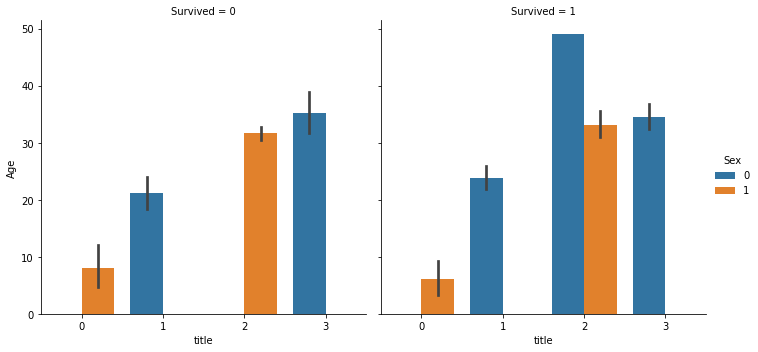

In [140]:
sns.catplot(x="title", y="Age", hue="Sex",col= "Survived",data=train,kind="bar")

In [141]:
train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_code,last_name,title,ticket_type
0,1,0,3,1,22.0,1,0,7.2500,2,8,73,2,0
1,2,1,1,0,38.0,1,0,71.2833,0,2,136,3,10
2,3,1,3,0,26.0,0,0,7.9250,2,8,255,1,26
3,4,1,1,0,35.0,1,0,53.1000,2,2,202,3,9
4,5,0,3,1,35.0,0,0,8.0500,2,8,11,2,9


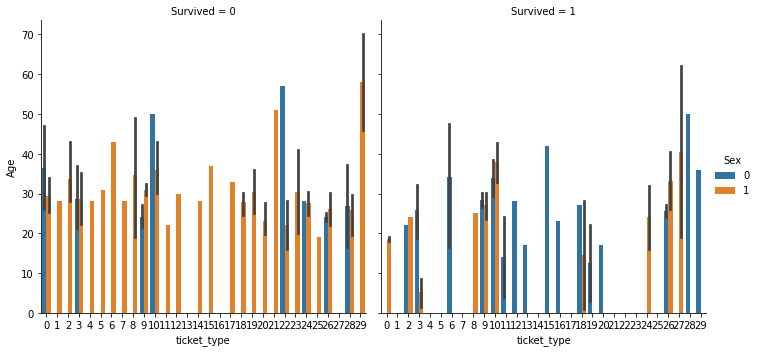

In [142]:
sns.catplot(x="ticket_type", y="Age", hue="Sex",col= "Survived",data=train,kind="bar")

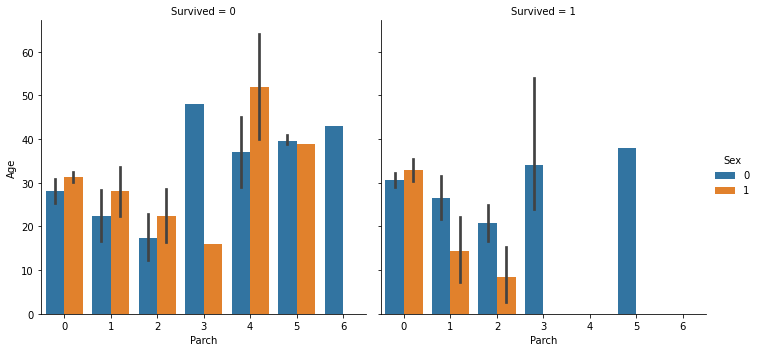

In [143]:
sns.catplot(x="Parch", y="Age", hue="Sex",col= "Survived",data=train,kind="bar")

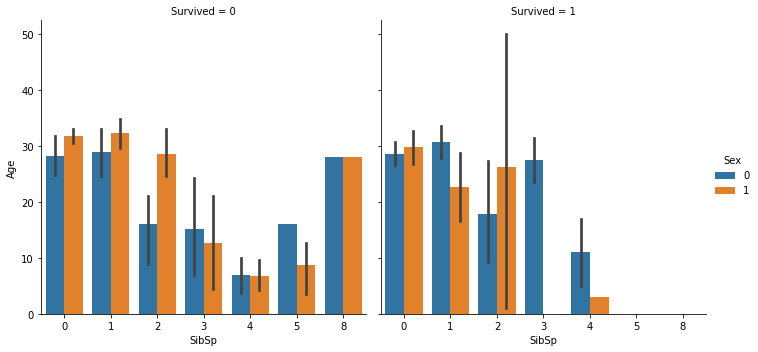

In [144]:
sns.catplot(x="SibSp", y="Age", hue="Sex",col= "Survived",data=train,kind="bar")

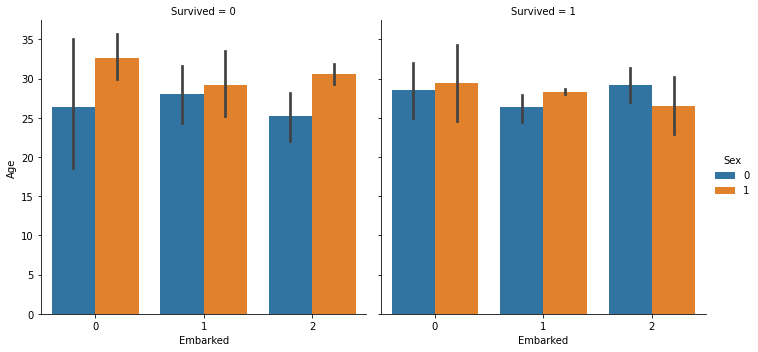

In [145]:
sns.catplot(x="Embarked", y="Age", hue="Sex",col= "Survived",data=train,kind="bar")

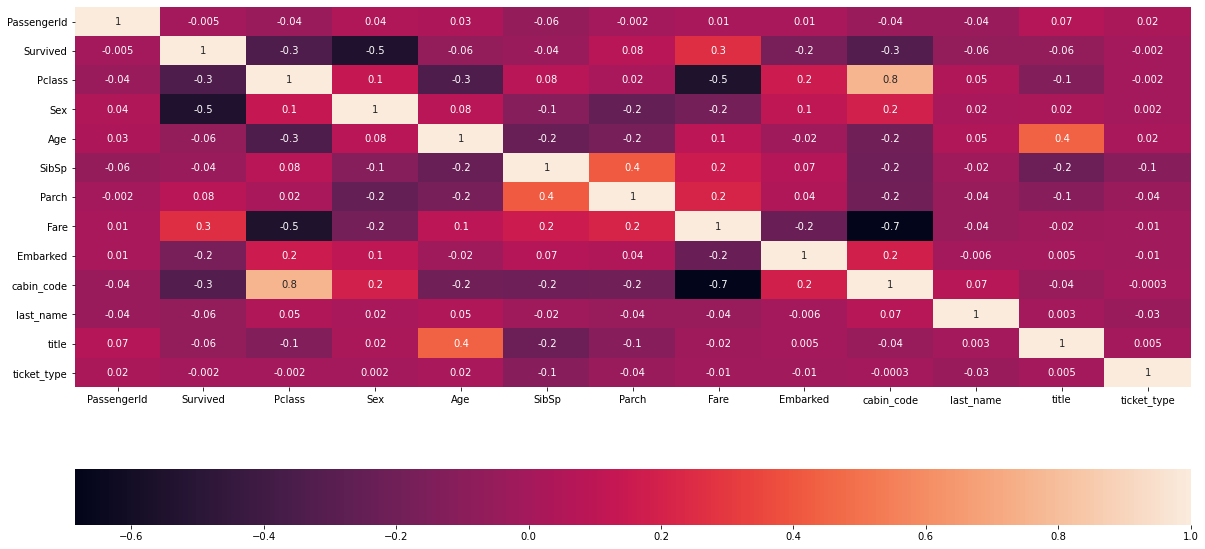

In [68]:
plt.figure(figsize = (20,10))
sns.heatmap(train.corr(), annot = True,fmt='.1g', cbar_kws= {'orientation': 'horizontal'} )

#### - Cabin code and pclass highly correlated
#### - Cabin code and fare highly correlated
#### - Pclass and Fare highly correlated
#### - Age and title highly correlated
#### - sibsp and parch highly correlated

### Fixing Cabin code, pclass and fare correlation

In [69]:
pd.pivot_table(train,index='Pclass',columns ='cabin_code',values='Fare',aggfunc = 'mean' )

cabin_code,1,2,3,4,5,6,7,8
Pclass,,,,,,,,
1,127.363989,99.027277,62.460106,55.18920,38.860963,35.5,27.295229,0.000000
2,NaN,NaN,50.015155,11.58750,37.057385,NaN,24.968565,11.655870
3,NaN,NaN,63.022900,33.67583,34.290476,NaN,22.496964,8.910065


In [70]:
pd.pivot_table(train,index='Pclass',columns ='cabin_code',values='Fare',aggfunc = 'min' )

cabin_code,1,2,3,4,5,6,7,8
Pclass,,,,,,,,
1,0.0,26.55,25.9292,25.5875,0.000,35.5,25.925,0.0
2,NaN,NaN,12.8750,10.5000,32.500,NaN,10.500,0.0
3,NaN,NaN,56.4958,8.0500,31.275,NaN,7.750,0.0


In [71]:
train['class_cabin'] = train.apply(lambda x: int(str(int(x.cabin_code)) + str(int(x.Pclass))), axis = 1)
test['class_cabin'] = test.apply(lambda x: int(str(int(x.cabin_code)) + str(int(x.Pclass))), axis = 1)

In [72]:
pd.pivot_table(train,index='Pclass',columns ='class_cabin',values='Fare',aggfunc = 'mean' )

class_cabin,11,21,31,32,33,41,42,43,51,52,53,61,71,72,73,81,82,83
Pclass,,,,,,,,,,,,,,,,,,
1,127.363989,99.027277,62.460106,NaN,NaN,55.1892,NaN,NaN,38.860963,NaN,NaN,35.5,27.295229,NaN,NaN,0.0,NaN,NaN
2,NaN,NaN,NaN,50.015155,NaN,NaN,11.5875,NaN,NaN,37.057385,NaN,NaN,NaN,24.968565,NaN,NaN,11.65587,NaN
3,NaN,NaN,NaN,NaN,63.0229,NaN,NaN,33.67583,NaN,NaN,34.290476,NaN,NaN,NaN,22.496964,NaN,NaN,8.910065


In [73]:
cols_to_drop = ['cabin_code','Pclass']
train.drop(cols_to_drop,axis=1,inplace = True)
test.drop(cols_to_drop,axis=1,inplace = True)

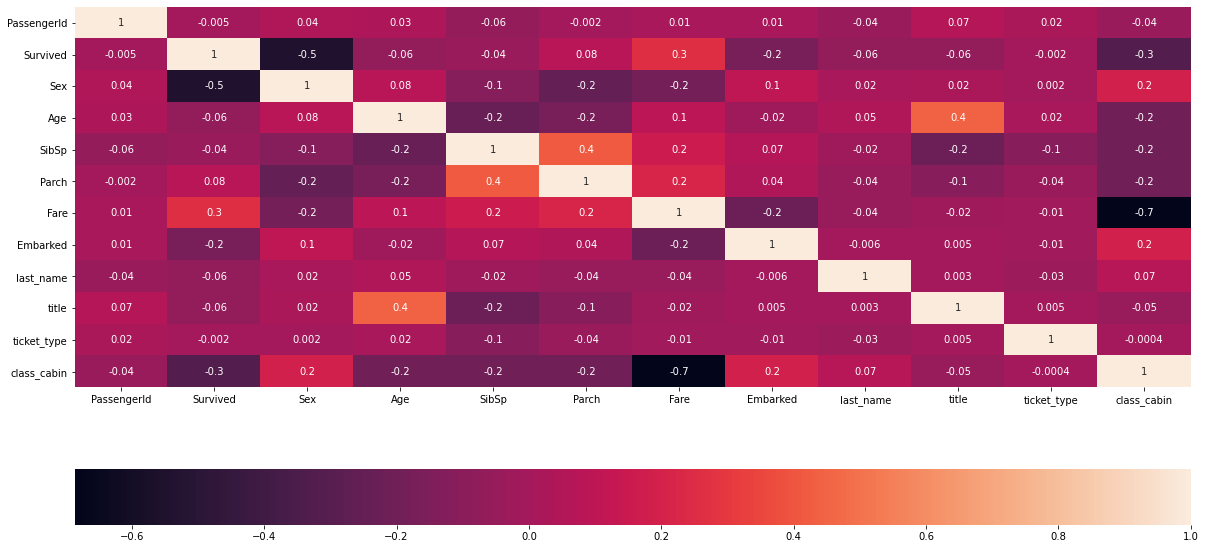

In [74]:
plt.figure(figsize = (20,10))
sns.heatmap(train.corr(), annot = True,fmt='.1g', cbar_kws= {'orientation': 'horizontal'} )

### Family Size correlation fix

In [75]:
train['family_size'] = train.apply(lambda x: x.SibSp + x.Parch, axis = 1)
test['family_size'] = test.apply(lambda x: x.SibSp + x.Parch, axis = 1)

In [76]:
cols_to_drop = ['SibSp','Parch']
train.drop(cols_to_drop,axis=1,inplace = True)
test.drop(cols_to_drop,axis=1,inplace = True)

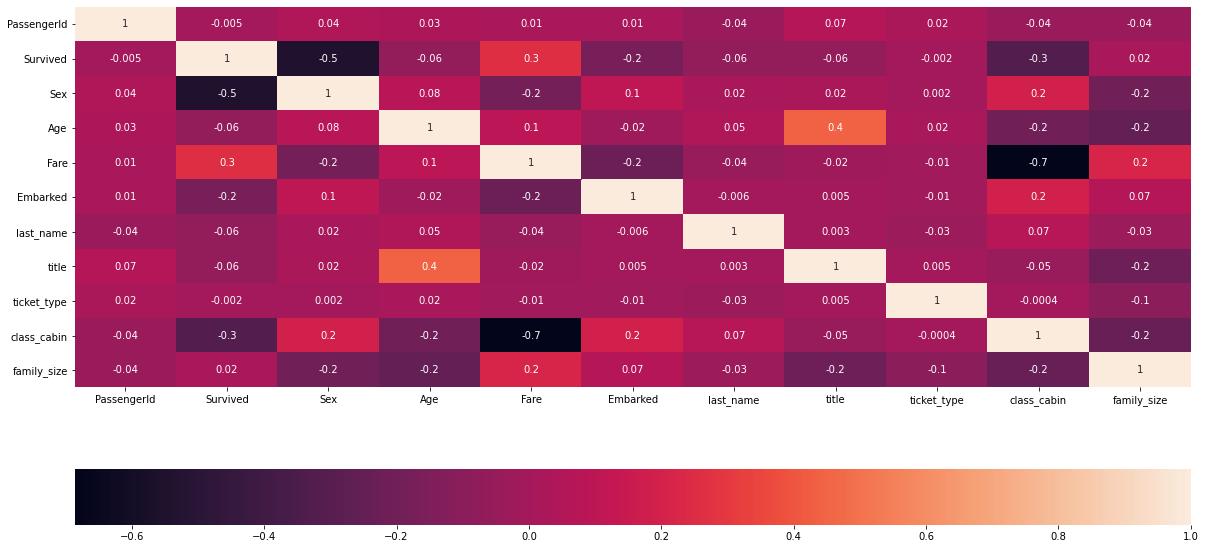

In [77]:
plt.figure(figsize = (20,10))
sns.heatmap(train.corr(), annot = True,fmt='.1g', cbar_kws= {'orientation': 'horizontal'} )

#### Saving the data for model building

In [78]:
train.to_csv('../datasets/train_to_model.csv',index = False)
test.to_csv('../datasets/test_to_model.csv',index = False)